# НИРС по дисциплине «Технологии машинного обучения»

В качестве набора данных мы будем использовать набор данных с различными характеристиками автомобилей, в том числе информацией о том, сколько автомобиль может проехать миль, потратив при этом один галлон бензина - https://www.kaggle.com/datasets/uciml/autompg-dataset

Датасет содержит следующие колонки:

- mpg - миль на галлон.- 
cylinder - количество цилиндров.e- 
displaceme - объем двигателя.u- s
horsepo - мощность двигателя.o- us
we - вес.u- ous
acceler - ускорение.n- uous
mode - год выпуска.s- crete - происхождение.i- screte
 - название автомобиля (все названия уникальны).

Для решения задачи регрессии в качестве целевого признака будем использовать "mpg".nstance)

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from scipy.optimize import fmin_tnc
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score, root_mean_squared_error 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

In [2]:
mpg = pd.read_csv('C:\\MGTU\\6 semestr\\TMO\\auto-mpg.csv')

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
mpg.shape

(398, 9)

In [5]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [6]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
mpg = mpg[mpg['horsepower'] != '?']
mpg['horsepower'] = mpg['horsepower'].astype(float)

In [8]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [9]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
mpg = mpg.drop(columns=['car name'])

In [11]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


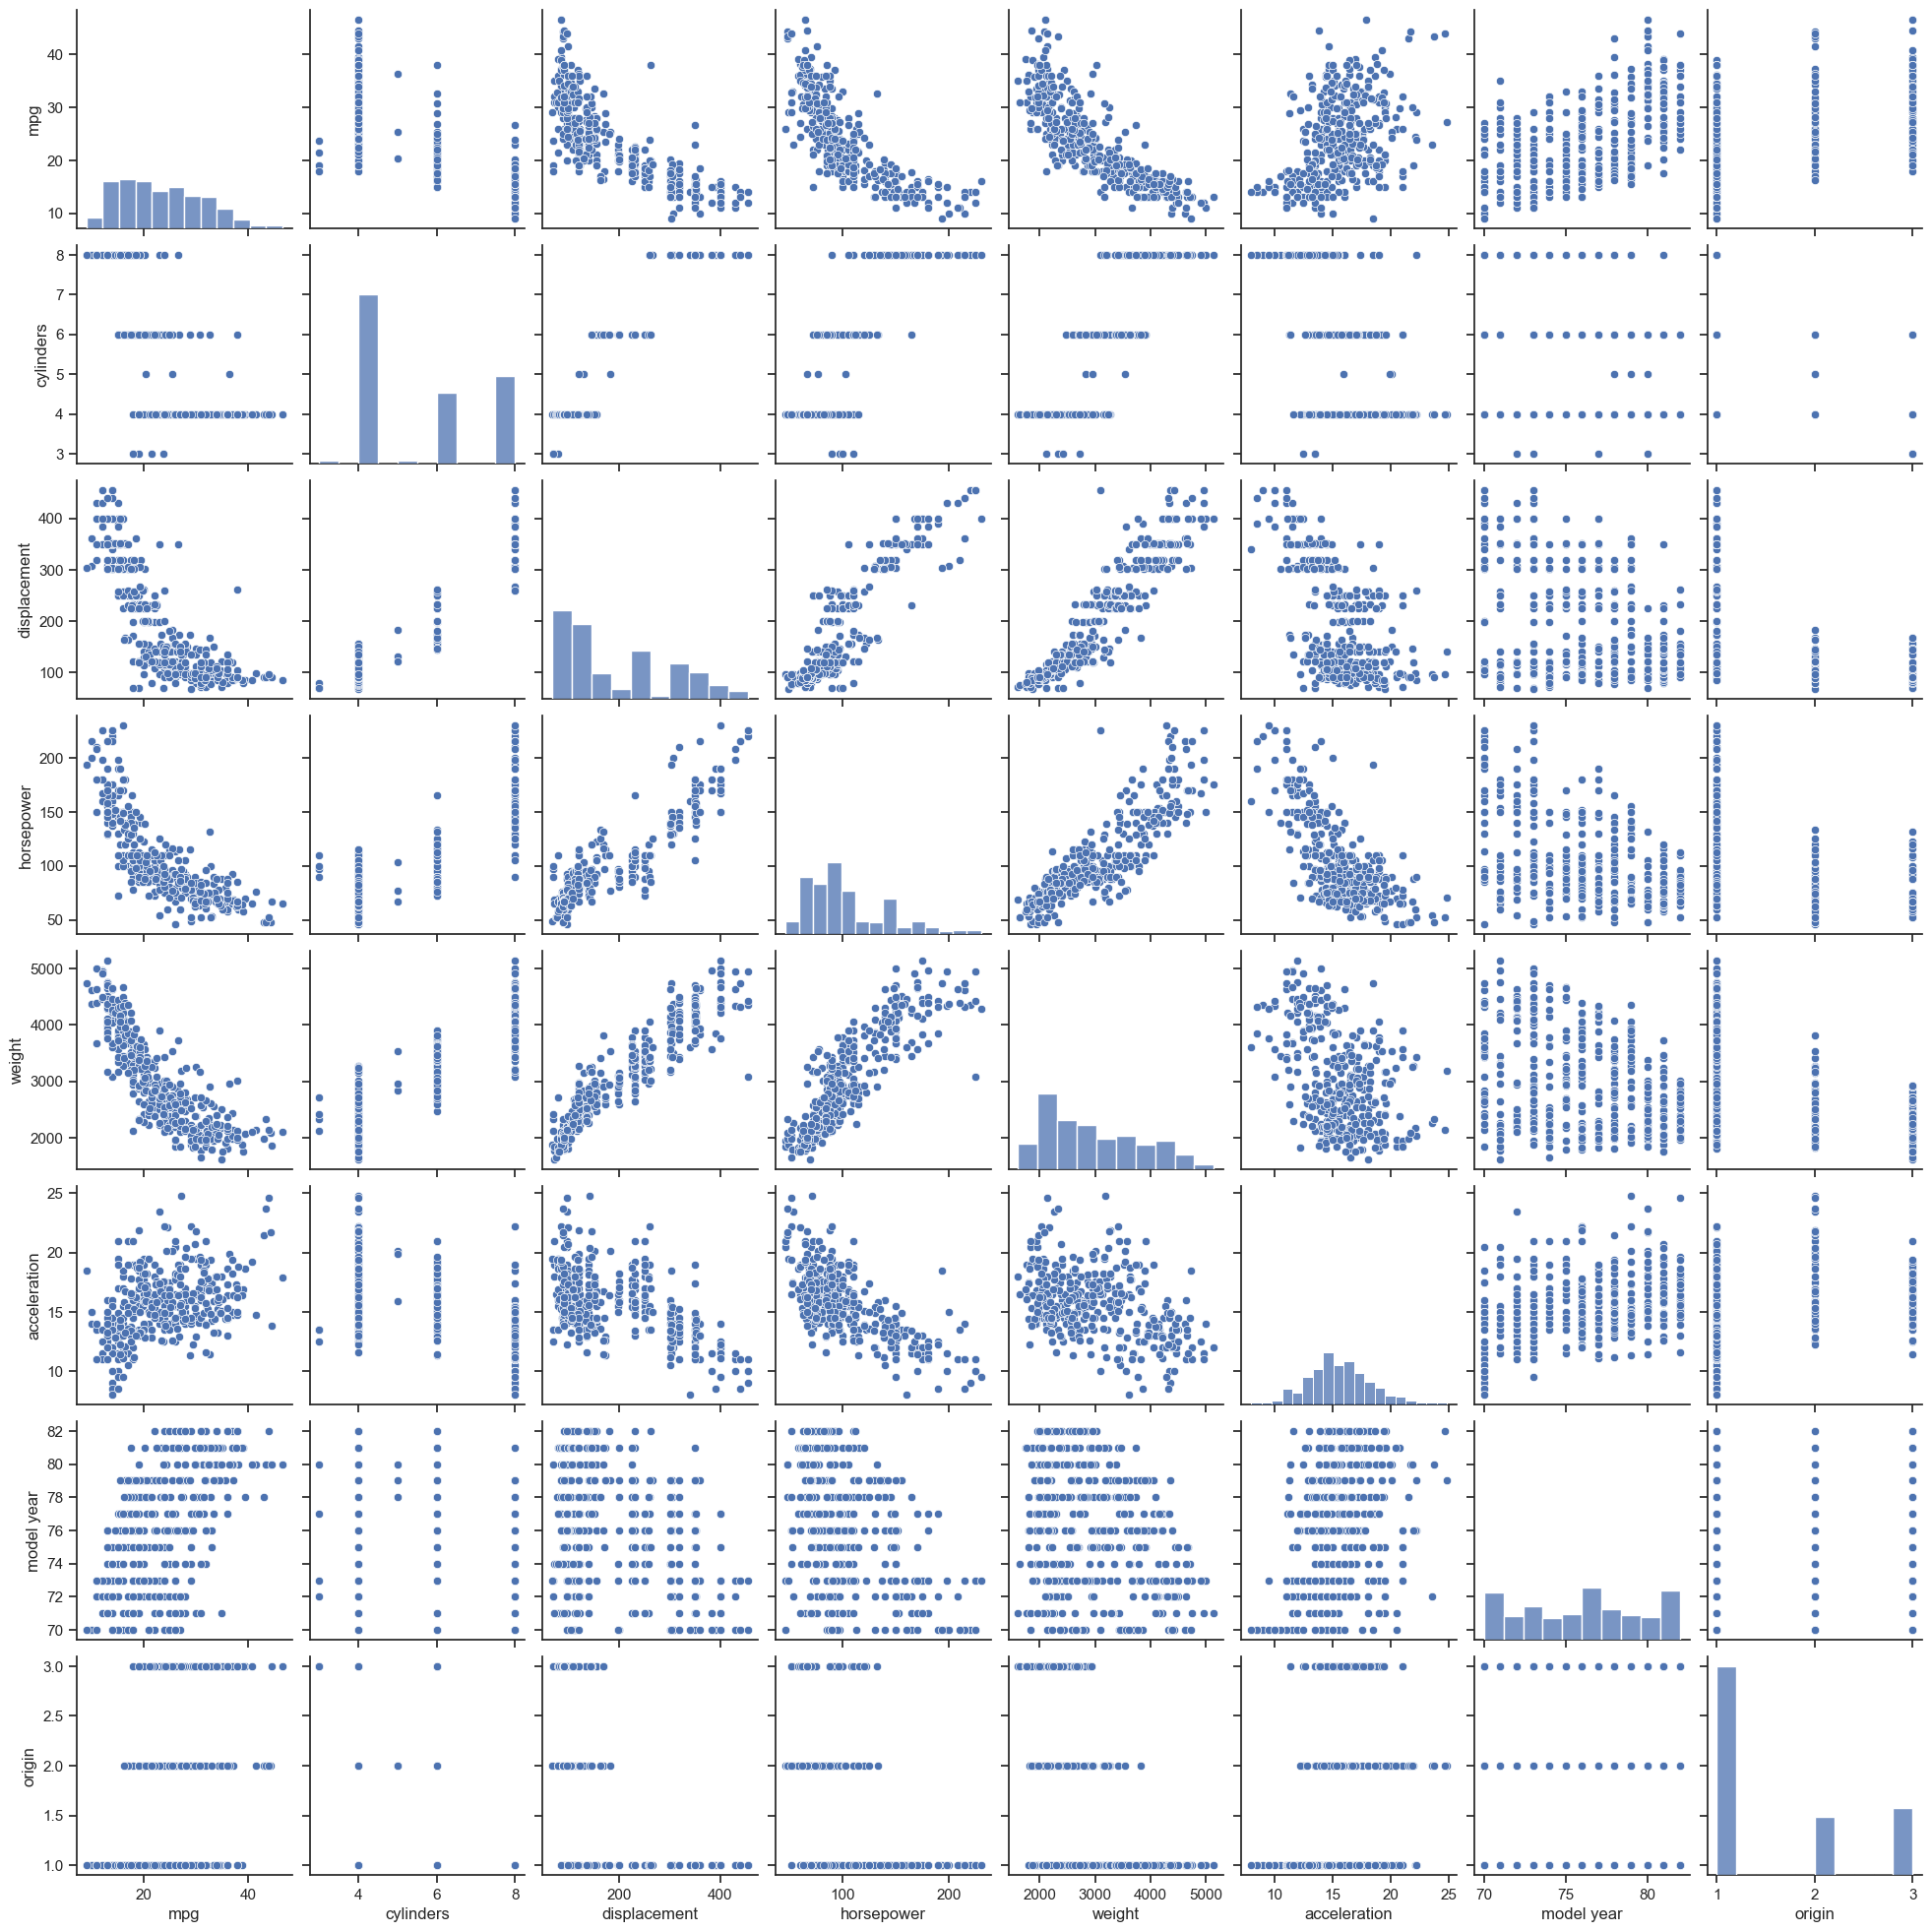

In [12]:
sns.pairplot(mpg)

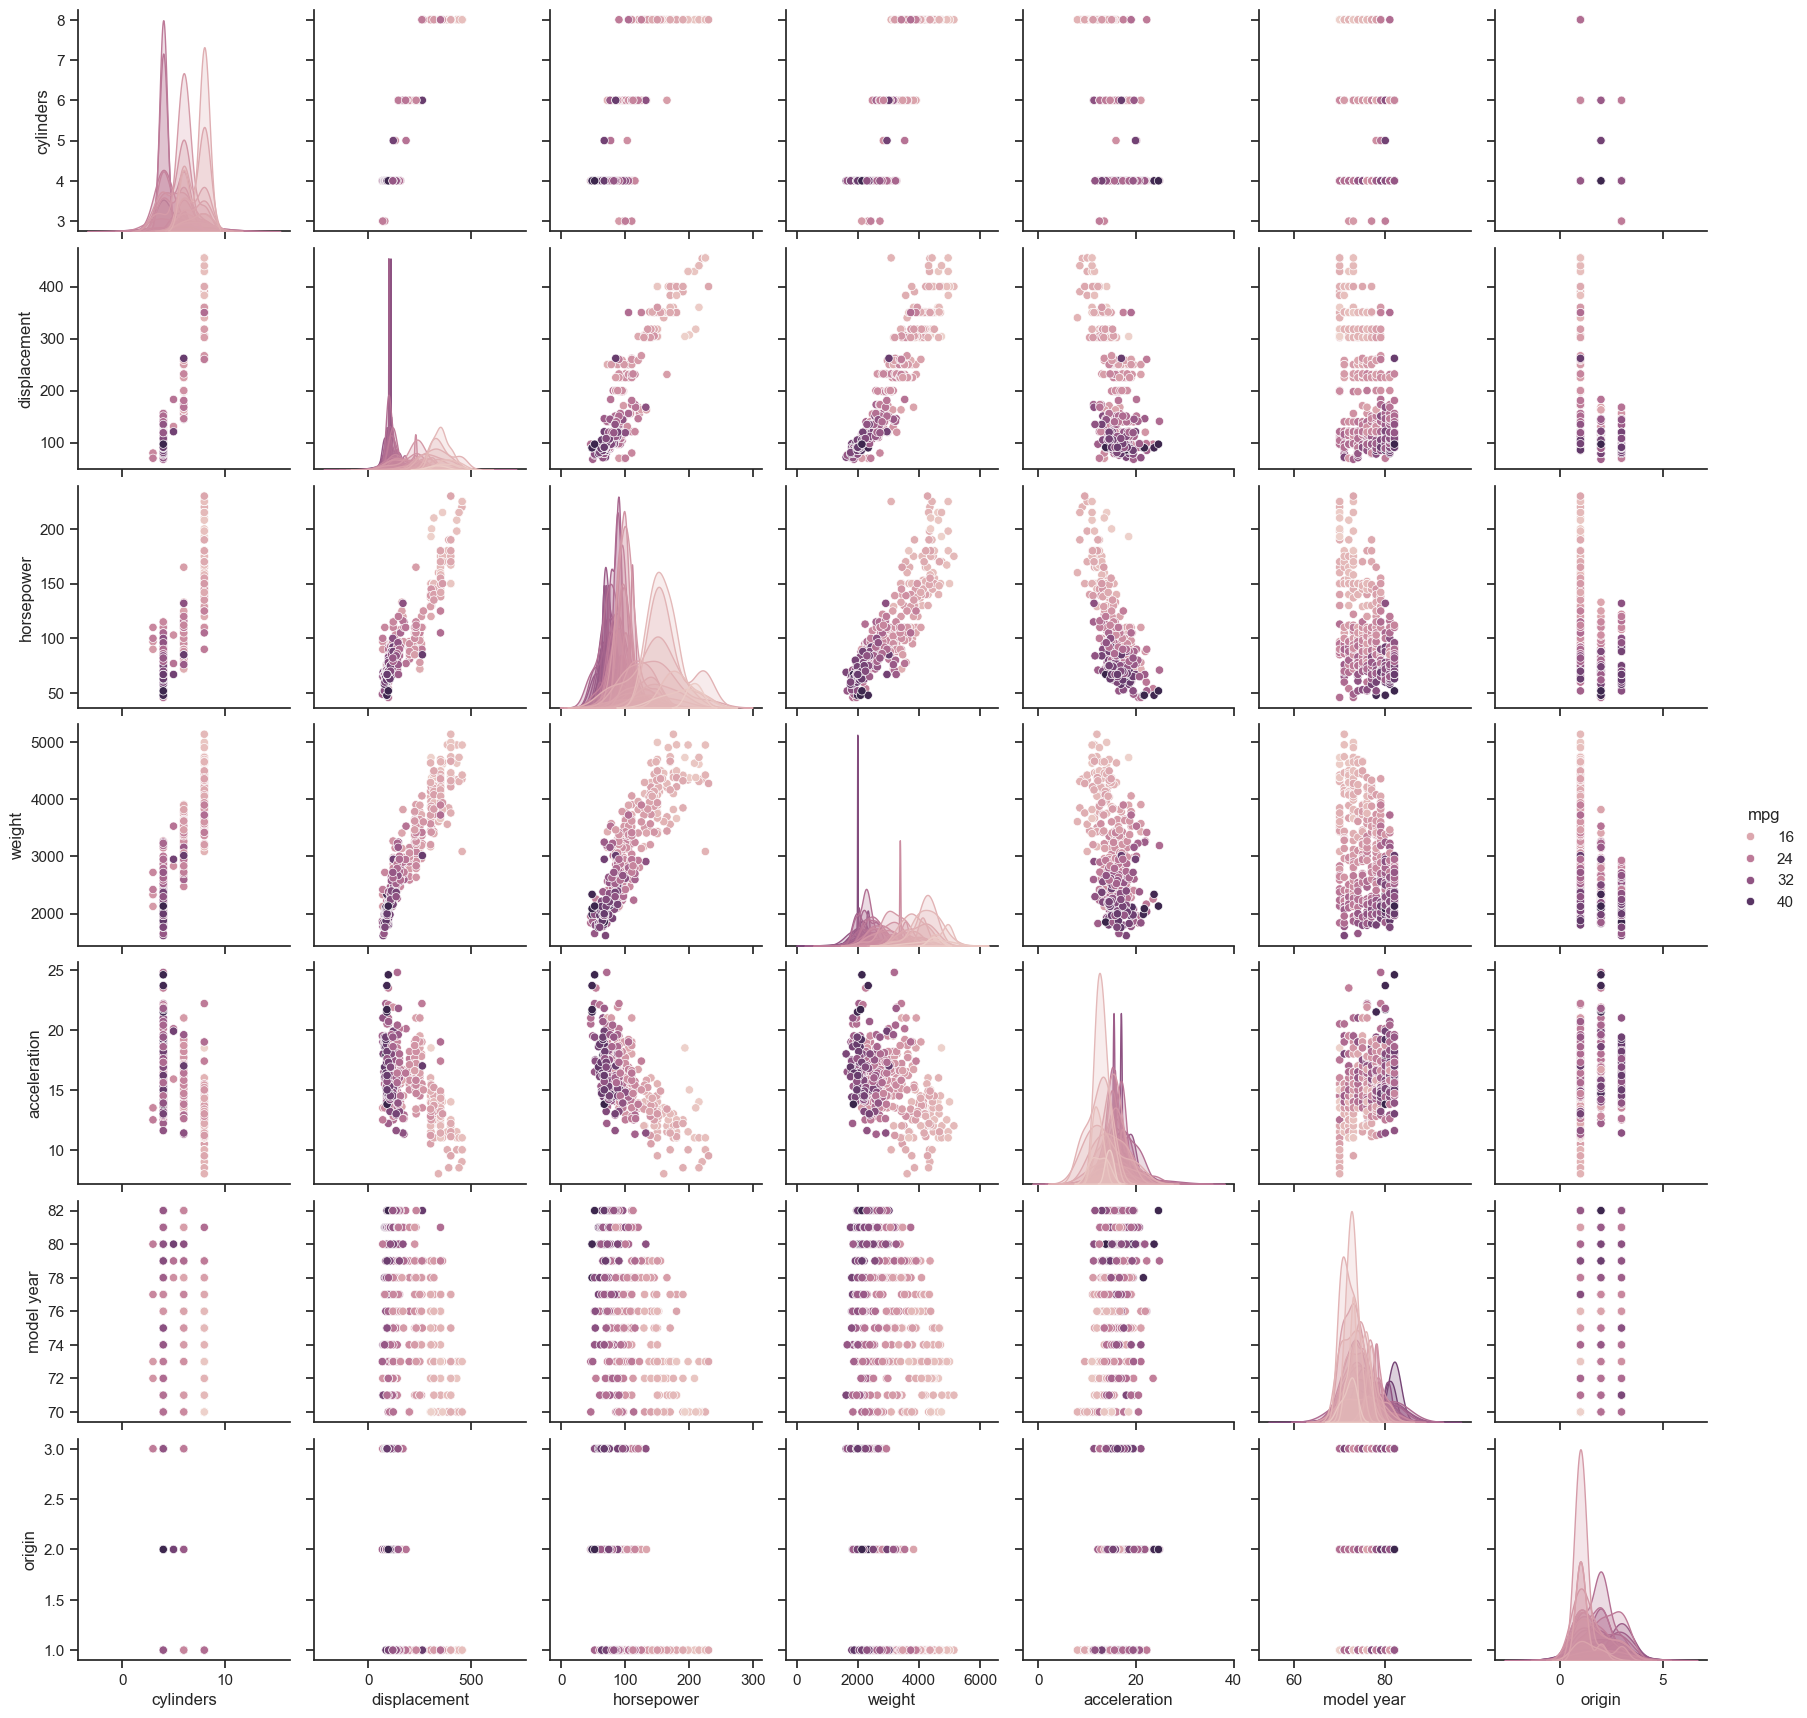

In [13]:
sns.pairplot(mpg, hue="mpg")

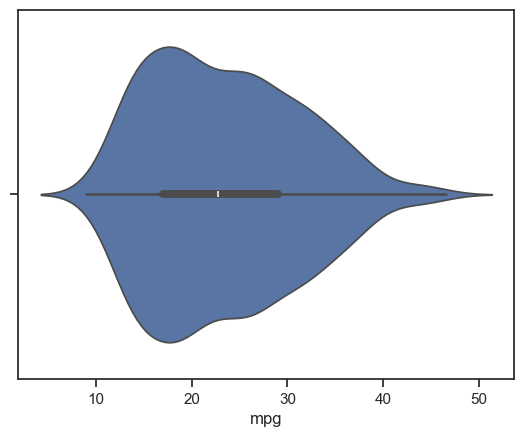

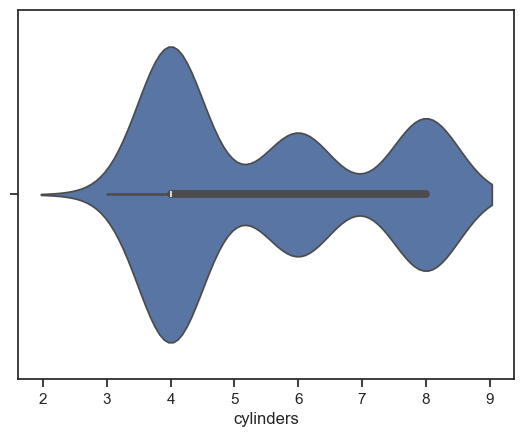

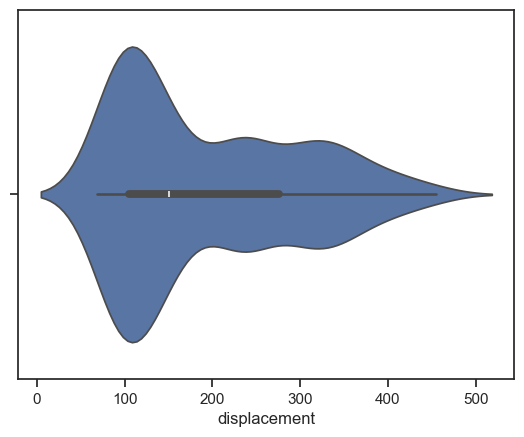

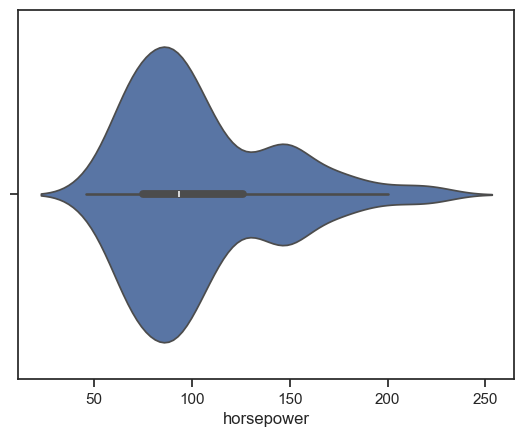

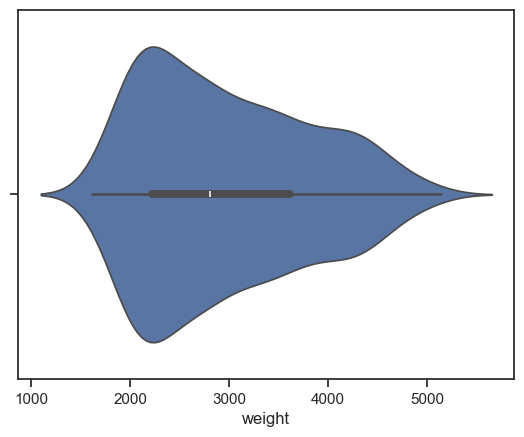

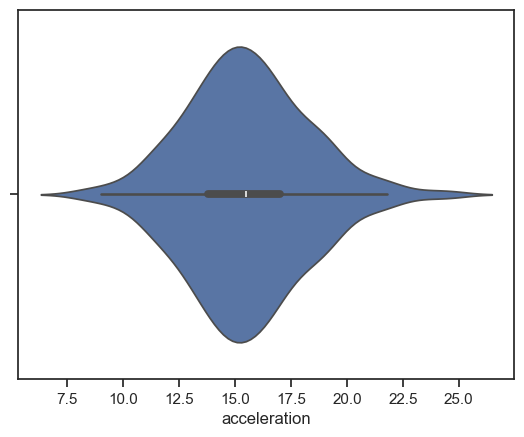

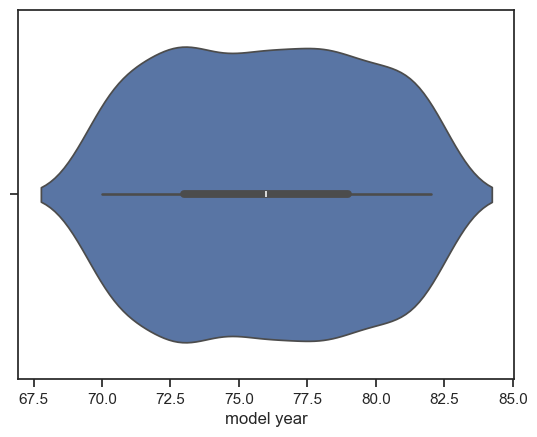

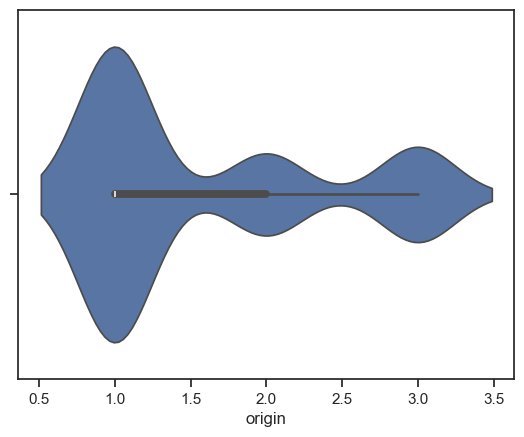

In [14]:
# Скрипичные диаграммы для числовых колонок
for col in ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']:
    sns.violinplot(x=mpg[col])
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

<Axes: >

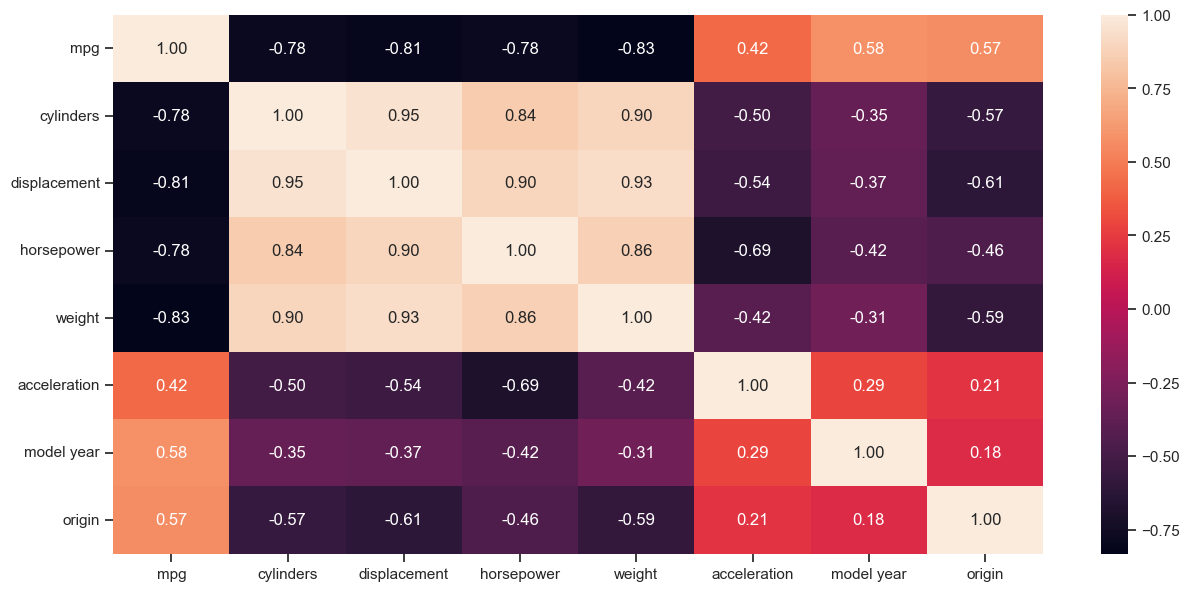

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(mpg.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:

- Целевой признак "mpg" коррелирует с "model year" (0.58) и "origin" (0.57). Эти признаки следует оставить в модели.
- Целевой признак "mpg" неплохо коррелирует "acceleration" (0.42), поэтому этот признак также оставим в модели.
- Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

## Выбор признаков, подходящих для построения моделей. Масштабирование данных.

Для построения моделей будем использовать признаки "model year", "origin" и "acceleration"

In [16]:
mpg = mpg.drop(columns=['cylinders', 'displacement', 'horsepower', 'weight'])

In [17]:
mpg.head()

,mpg,acceleration,model year,origin
0,18.0,12.0,70,1
1,15.0,11.5,70,1
2,18.0,11.0,70,1
3,16.0,12.0,70,1
4,17.0,10.5,70,1


In [18]:
# Числовые колонки для масштабирования
scale_cols = ['mpg', 'acceleration', 'model year', 'origin']

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(mpg[scale_cols])

In [20]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    mpg[new_col_name] = sc1_data[:,i]

In [21]:
mpg.head()

,mpg,acceleration,model year,origin,mpg_scaled,acceleration_scaled,model year_scaled,origin_scaled
0,18.0,12.0,70,1,0.239362,0.238095,0.0,0.0
1,15.0,11.5,70,1,0.159574,0.208333,0.0,0.0
2,18.0,11.0,70,1,0.239362,0.178571,0.0,0.0
3,16.0,12.0,70,1,0.186170,0.238095,0.0,0.0
4,17.0,10.5,70,1,0.212766,0.148810,0.0,0.0


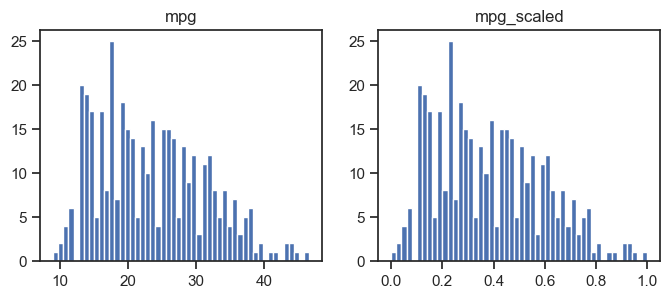

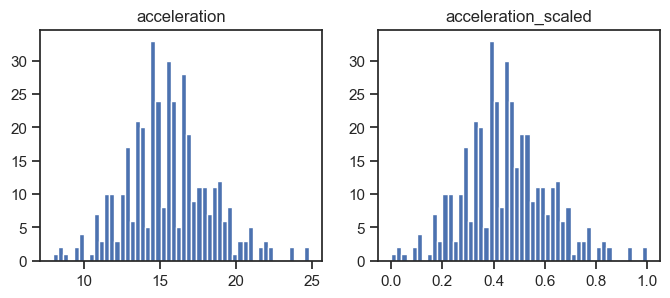

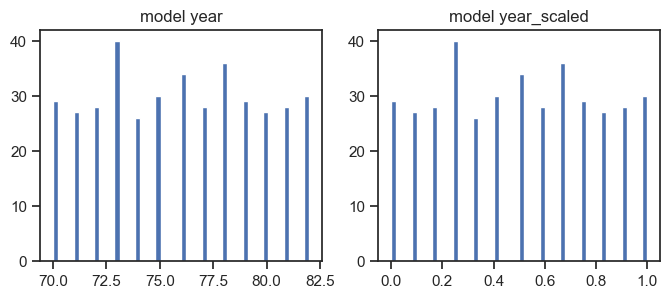

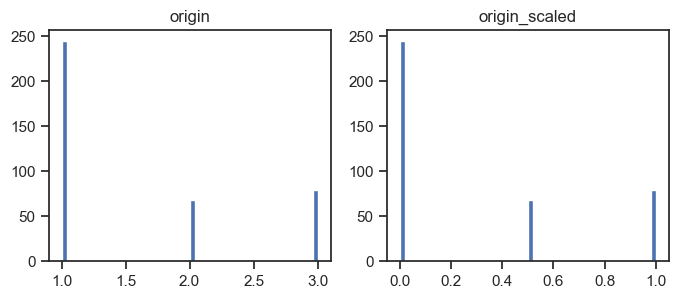

In [22]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(mpg[col], 50)
    ax[1].hist(mpg[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Выбор метрик для последующей оценки качества моделей

В качестве метрик для решения задачи регрессии будем использовать:
- Root mean squared error - корень из средней квадратичной ошибки- Mean squared error - средняя квадратичная ошибка
- Mean absolute error - средняя абсолютная ошибка|


## Выбор наиболее подходящих моделей для решения задачи регрессии.

Для задачи регрессии будем использовать следующие модели:

- Линейная регрессия
- Полиномиальная регрессия
- Решающее дерево
- Бэггинг
- Стекинг

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [23]:
X = mpg.drop(columns=['mpg', 'mpg_scaled', 'acceleration_scaled', 'model year_scaled', 'origin_scaled'])  # Признаки
y = mpg['mpg']  # Целевая переменная

X_sc = mpg.drop(columns=['mpg', 'mpg_scaled', 'acceleration', 'model year', 'origin'])  # Признаки
y_sc = mpg['mpg']

# Разделение данных на обучающую и тестовую выборки
mpg_X_train, mpg_X_test, mpg_y_train, mpg_y_test = train_test_split(X, y, test_size=0.2, random_state=1)

mpg_X_train_sc, mpg_X_test_sc, mpg_y_train_sc, mpg_y_test_sc = train_test_split(X_sc, y_sc, test_size=0.2, random_state=1)

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

#### Полиномиальная регрессия

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # Задаем степень полинома
X_train_poly = poly.fit_transform(mpg_X_train_sc)
X_test_poly = poly.transform(mpg_X_test_sc)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, mpg_y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_poly)

In [25]:
root_mean_squared_error(mpg_y_test_sc, y_pred)

4.578377941218863

In [26]:
mean_squared_error(mpg_y_test_sc, y_pred)

20.961544572639475

In [27]:
mean_absolute_error(mpg_y_test_sc, y_pred)

3.454133163722038

#### Линейная регрессия

In [28]:
reg = LinearRegression().fit(mpg_X_train_sc, mpg_y_train_sc)

In [29]:
root_mean_squared_error(mpg_y_test_sc, reg.predict(mpg_X_test_sc))

5.178810184839944

In [30]:
mean_squared_error(mpg_y_test_sc, reg.predict(mpg_X_test_sc))

26.82007493060193

In [31]:
mean_absolute_error(mpg_y_test_sc, reg.predict(mpg_X_test_sc))

4.071348649066694

#### Решающее дерево

In [32]:
from sklearn.tree import DecisionTreeRegressor
mpg_tree_regr = DecisionTreeRegressor(random_state=1).fit(mpg_X_train, mpg_y_train)
mpg_y_test_predict = mpg_tree_regr.predict(mpg_X_test)

In [33]:
root_mean_squared_error(mpg_y_test, mpg_y_test_predict)

5.742868444835172

In [34]:
mean_squared_error(mpg_y_test, mpg_y_test_predict)

32.98053797468354

In [35]:
mean_absolute_error(mpg_y_test, mpg_y_test_predict)

4.065189873417721

#### Бэггинг

In [36]:
br_mpg = BaggingRegressor(n_estimators=1000, oob_score = False, random_state=10)
br_mpg.fit(mpg_X_train,mpg_y_train )
br_mpg_predict =  br_mpg.predict(mpg_X_test)

In [37]:
root_mean_squared_error(mpg_y_test, br_mpg_predict)

4.566325406114563

In [38]:
mean_squared_error(mpg_y_test, br_mpg_predict)

20.851327714527333

In [39]:
mean_absolute_error(mpg_y_test, br_mpg_predict)

3.4769334460335686

#### Стекинг

In [40]:
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
# Используем библиотеку heamy
# набор данных
dataset = Dataset(mpg_X_train, mpg_y_train, mpg_X_test)
dataset_poly = Dataset(X_train_poly, mpg_y_train, X_test_poly)

# модели первого уровня
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={},name='lr')
model_bg = Regressor(dataset=dataset, estimator=BaggingRegressor, parameters={'n_estimators': 1000},name='bg')
model_pol = Regressor(dataset=dataset_poly, estimator=LinearRegression, parameters={},name='pol')

In [41]:
# mean_absolute_error
# Первый уровень - 2 модели: полиномиальная регрессия и бэггинг
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_pol, model_bg)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [4.708433498250678, 3.5953682778588183, 3.9572726925413124, 3.3045497242269217, 3.5748855359030696, 3.469445385018681, 4.102834961096556, 3.261836647122506, 3.971280716626099, 4.281023672658598]
Mean accuracy: 3.8226931111303237
Standard Deviation: 0.4397924517457324
Variance: 0.19341740061252236


In [42]:
# root_mean_squared_error
# Первый уровень - 2 модели: полиномиальная регрессия и бэггинг
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_pol, model_bg)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=root_mean_squared_error)

Metric: root_mean_squared_error
Folds accuracy: [5.947941061592714, 4.338723223706976, 4.878281667909527, 4.02693842237168, 4.638344292008244, 4.86988860840964, 5.071566013589808, 4.249964465372034, 4.828411927700627, 5.21674658863976]
Mean accuracy: 4.806680627130101
Standard Deviation: 0.5211180280095948
Variance: 0.2715639991166089


In [43]:
# mean_squared_error
# Первый уровень - 2 модели: полиномиальная регрессия и бэггинг
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_pol, model_bg)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_squared_error)

Metric: mean_squared_error
Folds accuracy: [35.37800287218066, 18.82451921193426, 23.797632031462157, 16.21623305757332, 21.51423777120546, 23.715815058317983, 25.720781830199215, 18.062197956924994, 23.31356174356169, 27.214444970084568]
Mean accuracy: 23.375742650344428
Standard Deviation: 5.179360685107548
Variance: 26.825777106437737


In [44]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

In [45]:
# Результаты
array_labels = ['LR', 'BG', 'PR', 'TREE', 'ST']
array_mae = [5.178810184839944, 4.566325406114563, 4.578377941218863, 5.742868444835172, 4.806680627130101]

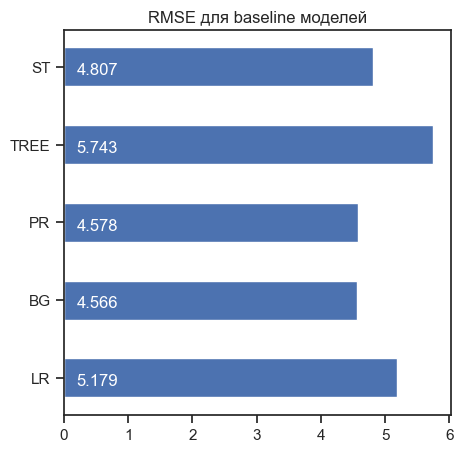

In [46]:
vis_models_quality(array_mae, array_labels, 'RMSE для baseline моделей')

In [47]:
# Результаты
array_labels = ['LR', 'BG', 'PR', 'TREE', 'ST']
array_mae = [26.82007493060193, 20.851327714527333, 20.961544572639475
, 32.98053797468354, 23.375742650344428]

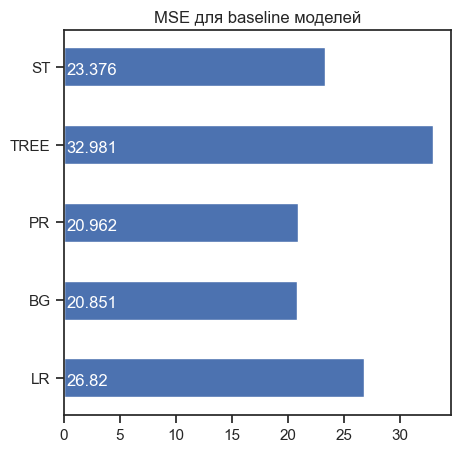

In [48]:
vis_models_quality(array_mae, array_labels, 'MSE для baseline моделей')

In [49]:
# Результаты
array_labels = ['LR', 'BG', 'PR', 'TREE', 'ST']
array_mae = [4.071348649066694, 3.4769334460335686, 3.454133163722038, 4.065189873417721, 3.8226931111303237]

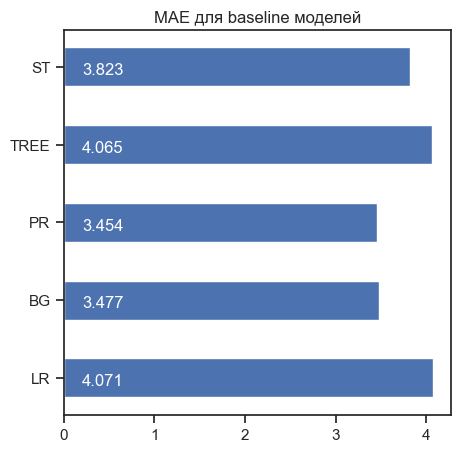

In [50]:
vis_models_quality(array_mae, array_labels, 'MAE для baseline моделей')

## Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

#### Полиномиальная регрессия

Лучшие параметры:  {'poly__degree': 2}
Mean Squared Error:  20.961544572639475
Root Mean Squared Error:  4.578377941218863
Mean Absolute Error:  3.454133163722038


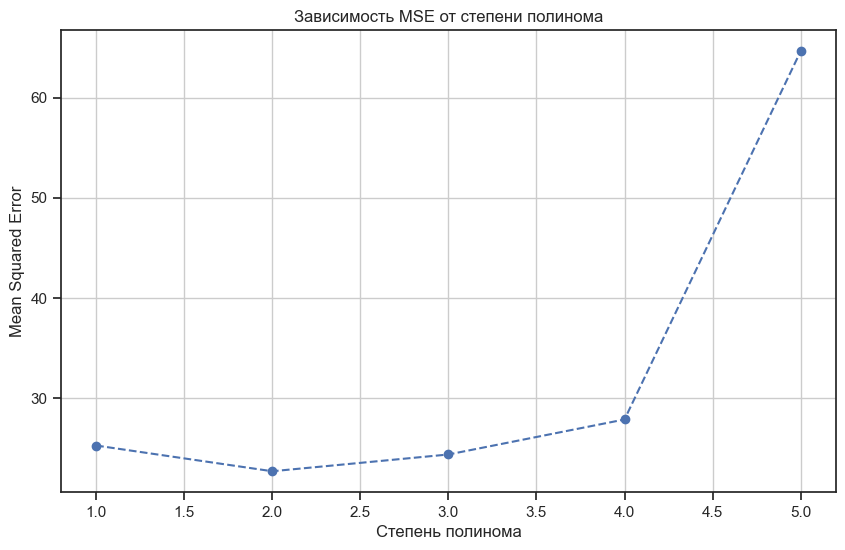

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Создаем пайплайн для полиномиальной регрессии
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Полиномиальные признаки
    ('linear', LinearRegression())   # Линейная регрессия
])

# Задаем параметры для GridSearchCV
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],  # Перебор степеней полинома
}

# Инициализируем GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Выполняем поиск по сетке
grid_search.fit(mpg_X_train_sc, mpg_y_train)

# Получаем наилучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры: ", best_params)

# Тренируем модель с наилучшими параметрами
best_model = grid_search.best_estimator_
y_pred = best_model.predict(mpg_X_test_sc)

# Вычисляем метрики
mse = mean_squared_error(mpg_y_test, y_pred)
rmse = root_mean_squared_error(mpg_y_test, y_pred)
mae = mean_absolute_error(mpg_y_test, y_pred)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
# График зависимости MSE от степени полинома
degrees = param_grid['poly__degree']
mean_test_scores = -grid_search.cv_results_['mean_test_score']  # Отрицательные значения, нужно поменять знак

plt.figure(figsize=(10, 6))
plt.plot(degrees, mean_test_scores, marker='o', linestyle='--')
plt.ylabel('Mean Squared Error')
plt.xlabel('Степень полинома')
plt.title('Зависимость MSE от степени полинома')
plt.grid(True)
plt.show()


#### Решающее дерево

Лучшие параметры:  {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Squared Error:  20.961544572639475
Root Mean Squared Error:  4.578377941218863
Mean Absolute Error:  3.454133163722038


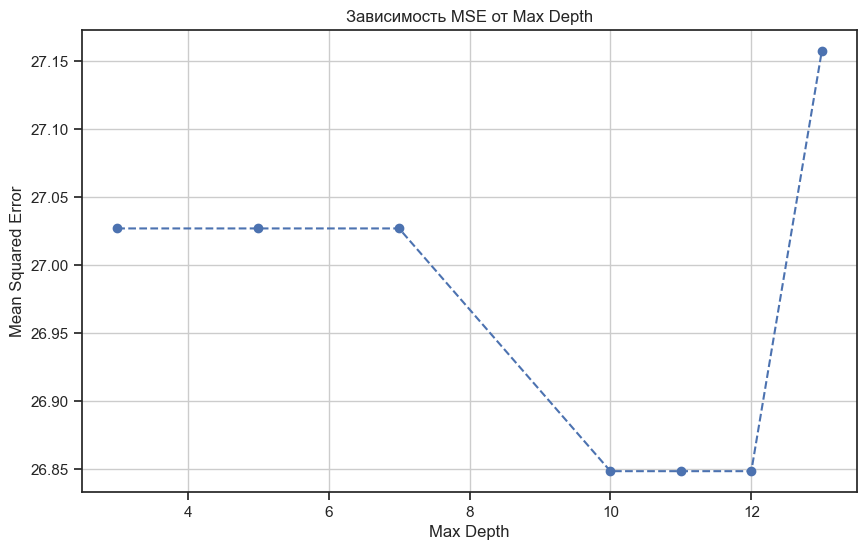

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Определяем параметры для GridSearchCV
param_grid = {
    'max_depth': [ 3, 5, 7, 10, 11, 12, 13, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Инициализируем GridSearchCV
tree_regressor = DecisionTreeRegressor(random_state=1)
grid_search = GridSearchCV(tree_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Выполняем поиск по сетке
grid_search.fit(mpg_X_train, mpg_y_train)

# Получаем наилучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры: ", best_params)

# Тренируем модель с наилучшими параметрами
best_model = grid_search.best_estimator_
mpg_y_test_predict = best_model.predict(mpg_X_test)

# Вычисляем метрики
mse = mean_squared_error(mpg_y_test, y_pred)
rmse = root_mean_squared_error(mpg_y_test, y_pred)
mae = mean_absolute_error(mpg_y_test, y_pred)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)

# График зависимости MSE от значений max_depth
depths = param_grid['max_depth']
mean_test_scores = -grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(depths, mean_test_scores[:len(depths)], marker='o', linestyle='--')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Зависимость MSE от Max Depth')
plt.grid(True)
plt.show()


#### Бэггинг

Лучшие параметры:  {'max_features': 1.0, 'max_samples': 0.3, 'n_estimators': 500, 'oob_score': True}
Mean Squared Error:  18.88678503158228
Root Mean Squared Error:  4.345892892327454
Mean Absolute Error:  3.2667512236286944


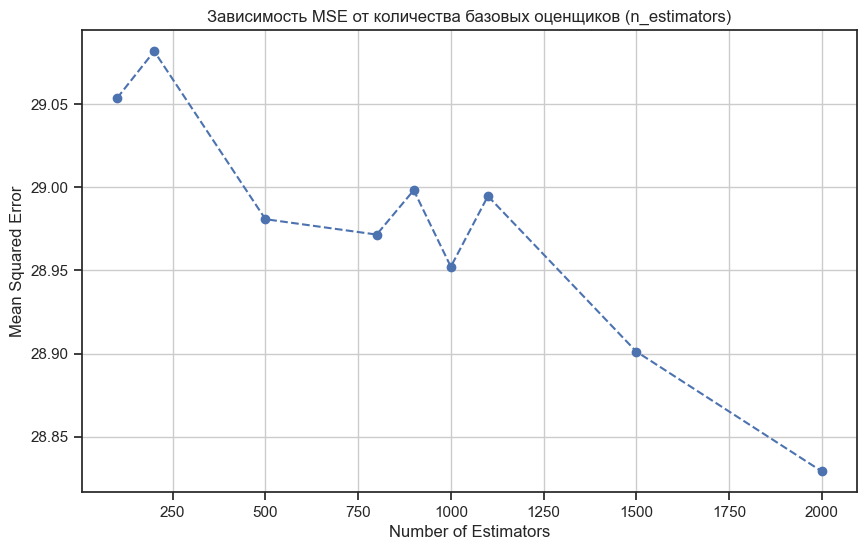

In [53]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Создаем базовый оценщик (DecisionTreeRegressor)
estimator = DecisionTreeRegressor(random_state=1)

# Определяем параметры для GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500, 800, 900, 1000, 1100, 1500, 2000],
    'max_features': [0.3, 0.5, 0.7, 1.0],
    'max_samples': [0.3, 0.5, 0.7, 1.0],
    'oob_score': [True, False]
}

# Инициализируем BaggingRegressor
br_mpg = BaggingRegressor(estimator=estimator, random_state=10)

# Инициализируем GridSearchCV
grid_search = GridSearchCV(br_mpg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Выполняем поиск по сетке
grid_search.fit(mpg_X_train, mpg_y_train)

# Получаем наилучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры: ", best_params)

# Тренируем модель с наилучшими параметрами
best_model = grid_search.best_estimator_
br_mpg_predict = best_model.predict(mpg_X_test)

# Вычисляем метрики
mse = mean_squared_error(mpg_y_test, br_mpg_predict)
rmse = root_mean_squared_error(mpg_y_test, br_mpg_predict)
mae = mean_absolute_error(mpg_y_test, br_mpg_predict)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)

# График зависимости MSE от количества базовых оценщиков (n_estimators)
n_estimators = param_grid['n_estimators']
mean_test_scores = -grid_search.cv_results_['mean_test_score']

# Получаем значения MSE для различных n_estimators и вычисляем среднее значение для каждого n_estimators
mean_test_scores_n_estimators = [np.mean(mean_test_scores[grid_search.cv_results_['param_n_estimators'] == n]) for n in n_estimators]

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, mean_test_scores_n_estimators, marker='o', linestyle='--')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Зависимость MSE от количества базовых оценщиков (n_estimators)')
plt.grid(True)
plt.show()


#### Стекинг 

In [57]:
from sklearn.ensemble import BaggingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# Полиномиальная регрессия в пайплайне
poly = PolynomialFeatures(degree=2)
model_pol = Pipeline([
    ('poly', poly),
    ('linear', LinearRegression())
])

# Бэггинг с деревом решений
model_bg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=1000, random_state=10)

# Стекинг-регрессор
estimators = [
    ('poly', model_pol),
    ('bg', model_bg)
]

stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Определяем параметры для GridSearchCV
param_grid = {
    'poly__poly__degree': [2, 3, 4],
    'bg__n_estimators': [500, 1000, 1500]
}

# Инициализируем GridSearchCV
grid_search = GridSearchCV(stacked_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Выполняем поиск по сетке
grid_search.fit(mpg_X_train_sc, mpg_y_train)

# Получаем наилучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры: ", best_params)

# Тренируем модель с наилучшими параметрами
best_model = grid_search.best_estimator_
y_test_predict = best_model.predict(mpg_X_test_sc)

# Вычисляем метрики
mae = mean_absolute_error(mpg_y_test, mpg_y_test_predict)
mse = mean_squared_error(mpg_y_test, mpg_y_test_predict)
rmse = root_mean_squared_error(mpg_y_test, mpg_y_test_predict)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Лучшие параметры:  {'bg__n_estimators': 1500, 'poly__poly__degree': 2}
Mean Squared Error:  21.10259416369467
Root Mean Squared Error:  4.593755997405029
Mean Absolute Error:  3.4166448471033344


### Сравнение качества полученных моделей с качеством baseline-моделей. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [58]:
# Результаты
array_labels = ['LR', 'BG', 'PR', 'TREE', 'ST', 'BG_P', 'PR_P', 'TREE_P', 'ST_P']
array_mae = [5.178810184839944, 4.566325406114563, 4.578377941218863, 5.742868444835172, 4.806680627130101, 4.345892892327454, 4.578377941218863, 4.578377941218863, 4.593755997405029  ]

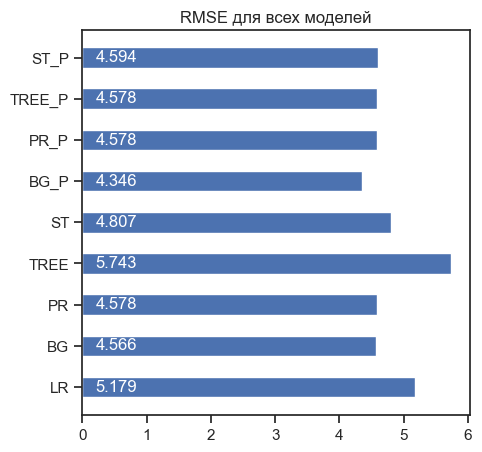

In [59]:
vis_models_quality(array_mae, array_labels, 'RMSE для всех моделей')

In [60]:
# Результаты
array_labels = ['LR', 'BG', 'PR', 'TREE', 'ST', 'BG_P', 'PR_P', 'TREE_P', 'ST_P']
array_mae = [26.82007493060193, 20.851327714527333, 20.961544572639475, 32.98053797468354, 23.375742650344428, 18.88678503158228, 20.961544572639475, 20.961544572639475, 21.10259416369467 ]

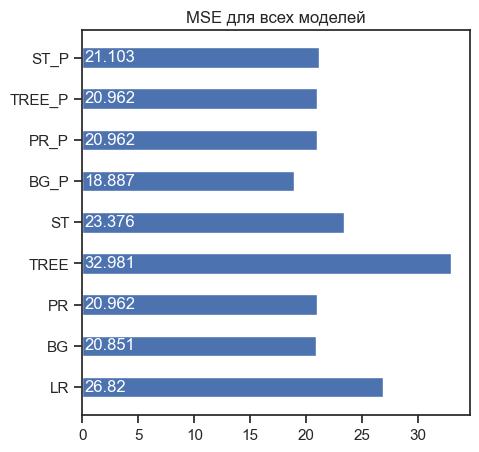

In [61]:
vis_models_quality(array_mae, array_labels, 'MSE для всех моделей')

In [62]:
# Результаты
array_labels = ['LR', 'BG', 'PR', 'TREE', 'ST', 'BG_P', 'PR_P', 'TREE_P', 'ST_P']
array_mae = [4.071348649066694, 3.4769334460335686, 3.454133163722038, 4.065189873417721, 3.8226931111303237, 3.2667512236286944,  3.454133163722038, 3.454133163722038, 3.4166448471033344]

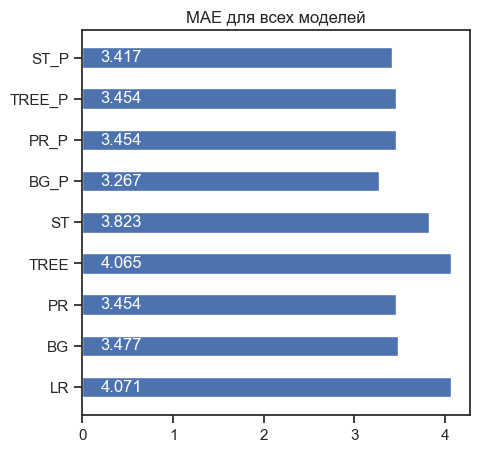

In [63]:
vis_models_quality(array_mae, array_labels, 'MAE для всех моделей')

#### Вывод: Качество моделей, обученных с учётом подбора гиперпараметров оказалось лучше, нежели качество моделей, обученных без подобранных гиперпараметров. Исключением стали лишь модели линейной и полиномиальной регрессии, так как у линейной регрессии нет возможности подбора гиперпараметров, а у полиномиальной регрессии изначально было выбрано правильное значение полинома. Поэтому качество этих двух моделей не изменилось. Лучший результат и с подобранными гиперпараметрами, и без них показала модель беггинга, а худший - решающее дерево.